In [80]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

In [121]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [122]:
test_id = test_data.Id

In [123]:
train_data = train_data.drop(['Id'] , axis = 1)

In [9]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


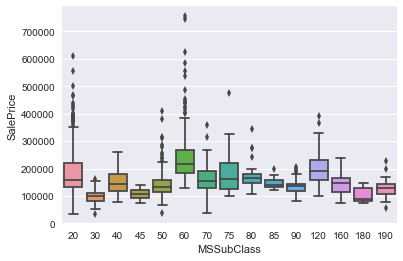

In [10]:
sns.boxplot(train_data['MSSubClass'] , train_data.SalePrice)

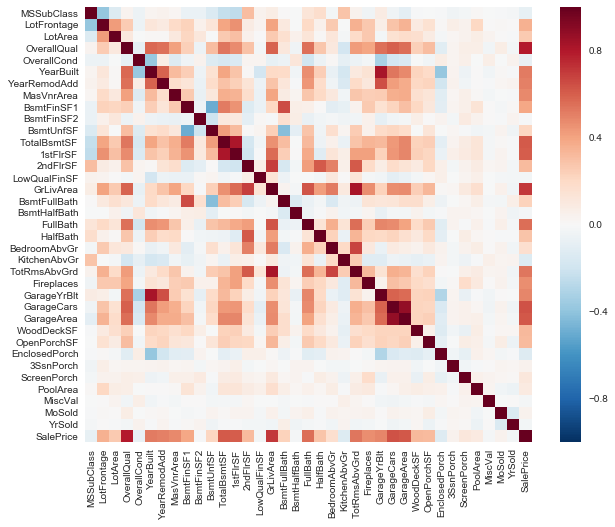

In [11]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)

In [124]:
largest_10_corr_matrix = corr_matrix.nlargest(10 , 'SalePrice')
largest_10_corr_matrix_index = largest_10_corr_matrix.index #largest corr
largest = train_data[largest_10_corr_matrix_index].corr()

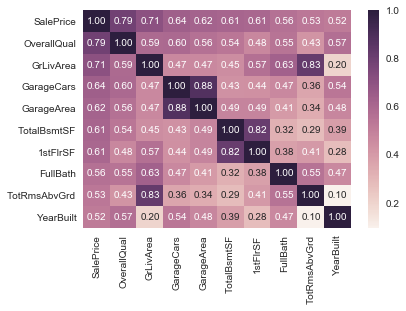

In [27]:
sns.heatmap(largest ,annot=True, fmt='.2f')

In [125]:
largest_10_corr_matrix_index = list(set(largest_10_corr_matrix_index)-set(['GarageArea' , '1stFlrSF']))

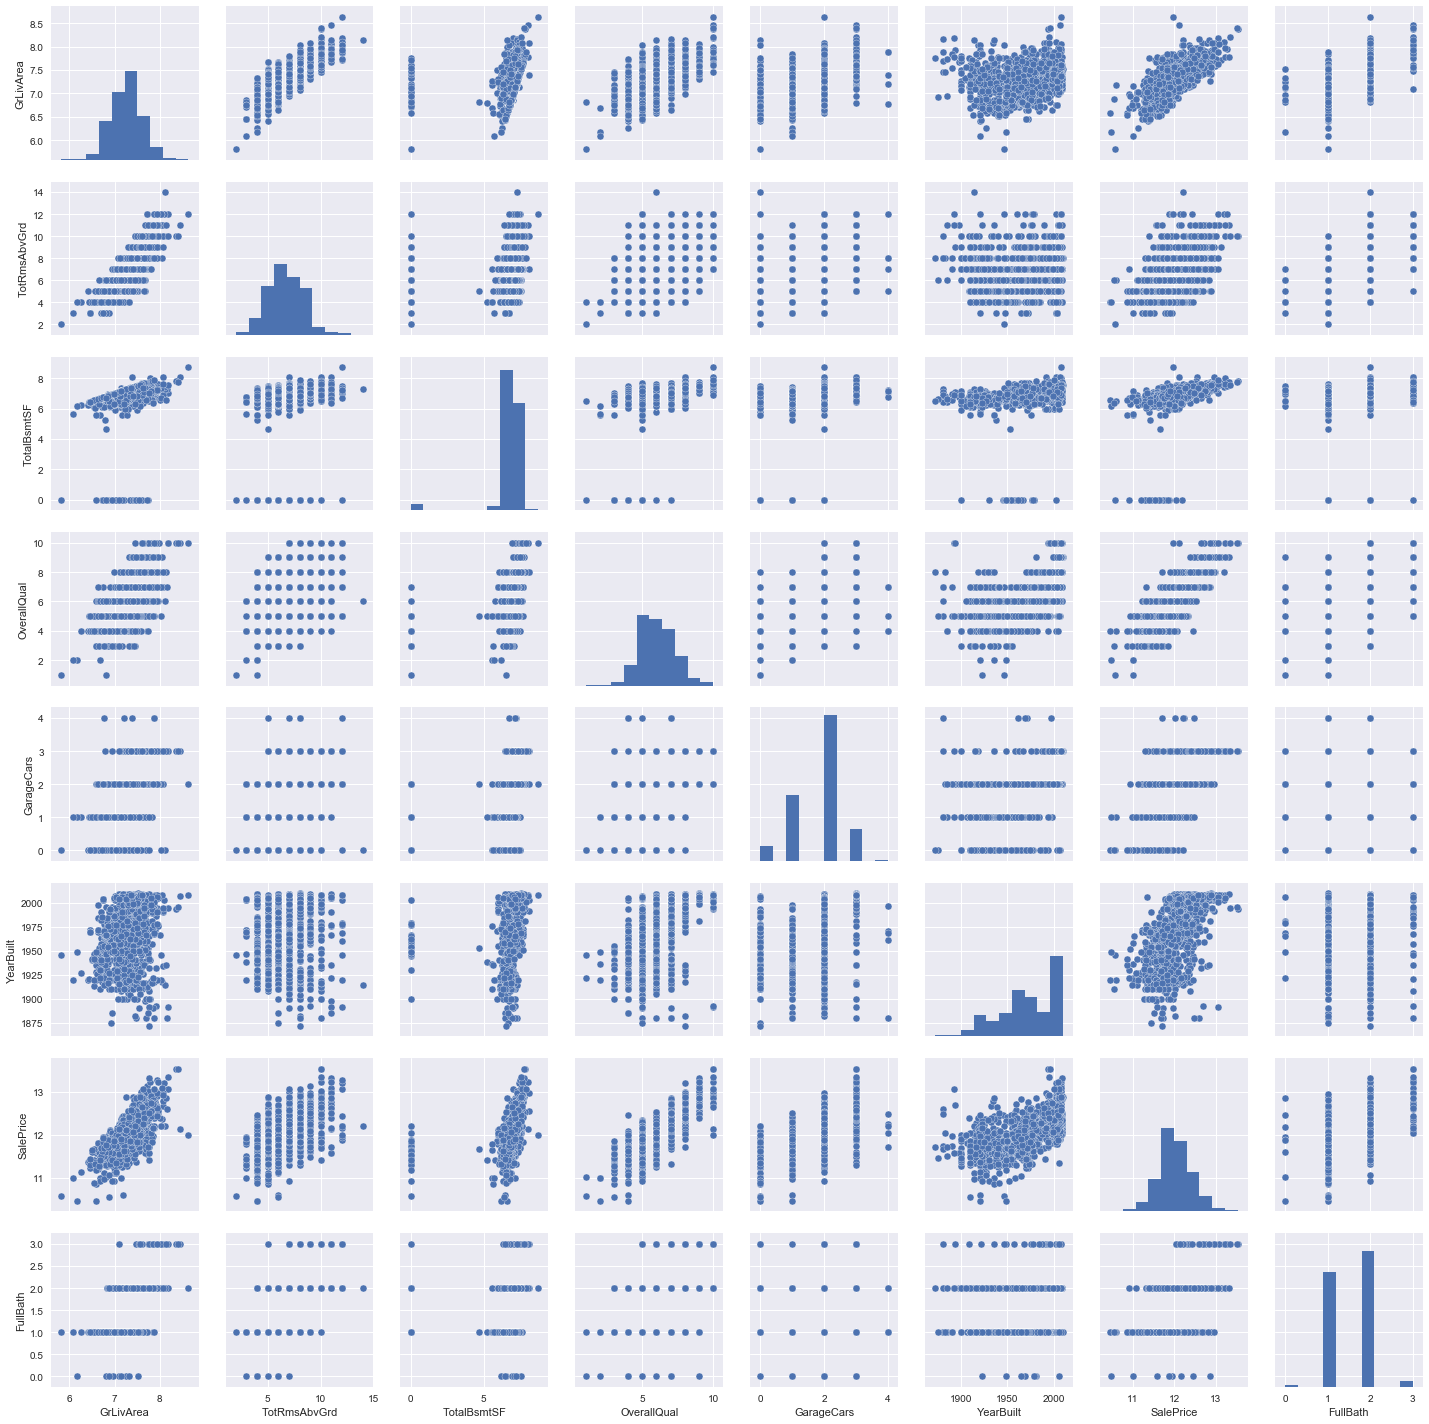

In [176]:
sns.set()
sns.pairplot(train_data[largest_10_corr_matrix_index])

In [178]:
largest_10_corr_matrix_index

['GrLivArea',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'OverallQual',
 'GarageCars',
 'YearBuilt',
 'SalePrice',
 'FullBath']

In [127]:
smallest_10_corr_matrix = corr_matrix.nsmallest(5 , 'SalePrice')
smallest_10_corr_matrix_index = smallest_10_corr_matrix.index #smallest corr

In [128]:
smallest_10_corr_matrix_index = list(set(smallest_10_corr_matrix_index)|{'SalePrice'})

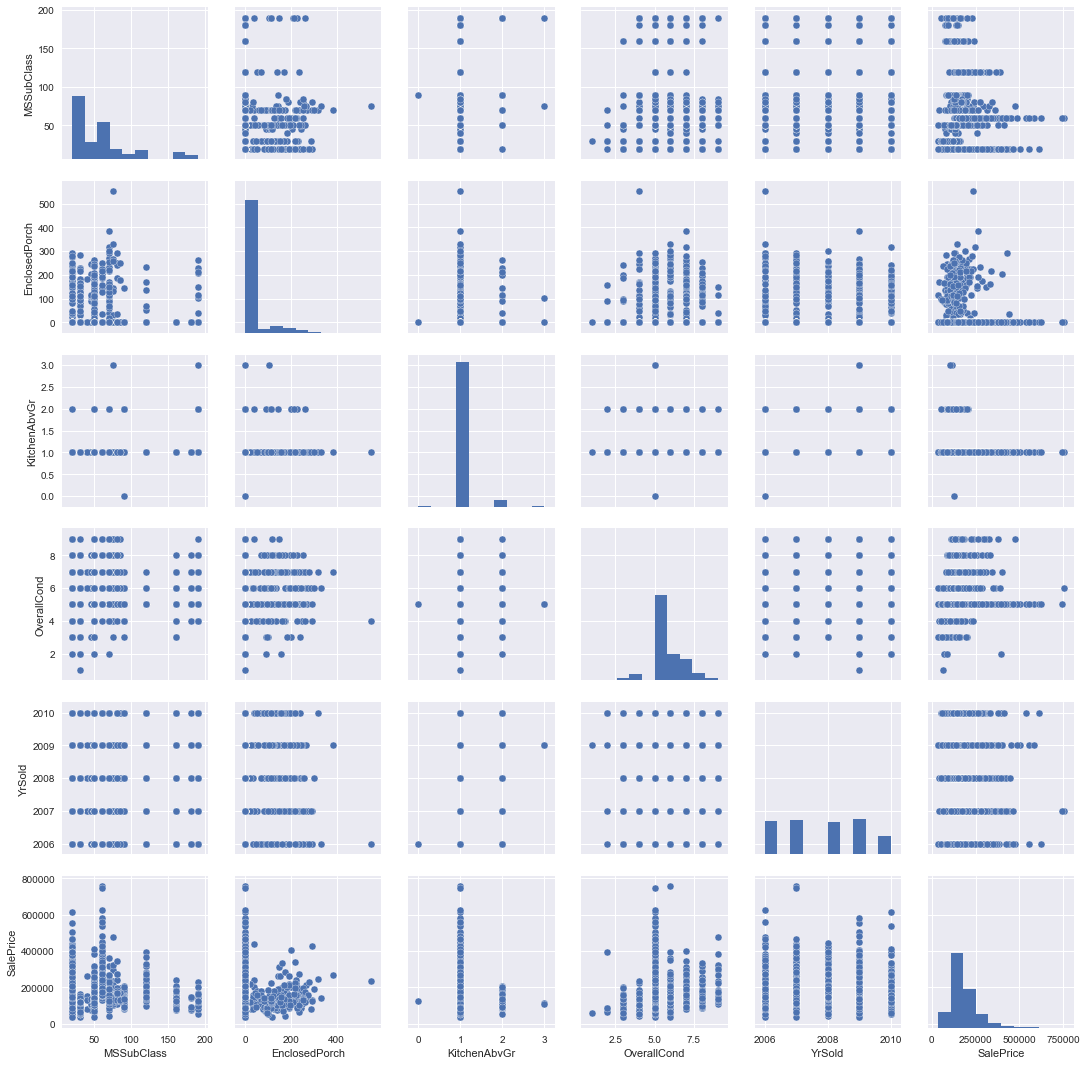

In [42]:
sns.pairplot(train_data[smallest_10_corr_matrix_index])#一些最小的负相关 毫无规律

In [51]:
train_data.isnull().sum().sort_values(ascending = False) #查看缺失值情况

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [129]:
missing_delete_feature = train_data.columns[train_data.isnull().sum().values > 1]

In [130]:
train_data = train_data.drop(missing_delete_feature , axis = 1)

In [131]:
train_data.shape

(1460, 62)

In [132]:
train_data.Electrical = train_data.Electrical.fillna(train_data.Electrical.mean)

In [133]:
#处理缺失值
#相关性最大的
#处理离群值
#除偏
#标称变量 哑变量



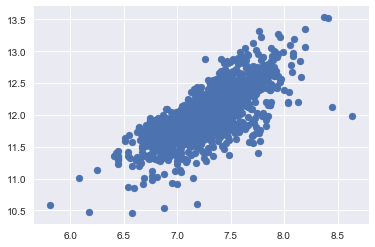

In [137]:
plt.scatter(train_data.GrLivArea , train_data.SalePrice)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

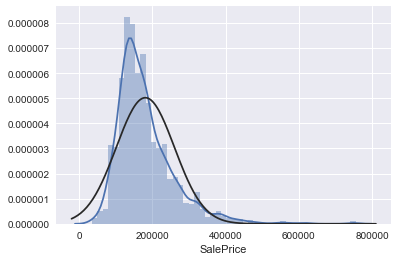

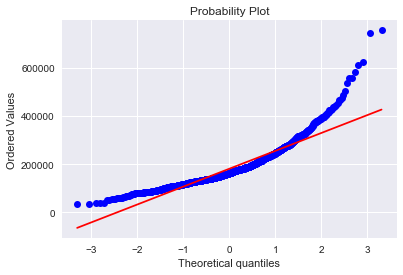

In [135]:
sns.distplot(train_data.SalePrice , fit=stats.norm)
fig = plt.figure()
stats.probplot(train_data.SalePrice , plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.40648507, 8.45019832,
         8.63799389])),
 (0.3333442531890887, 7.2677743833110044, 0.9977323160680611))

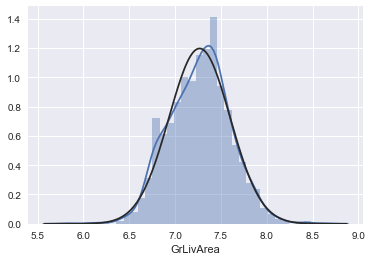

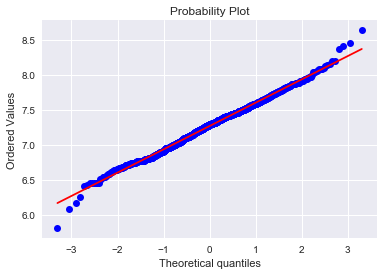

In [98]:
sns.distplot(train_data.GrLivArea , fit=stats.norm)
fig = plt.figure()
stats.probplot(train_data.GrLivArea , plot=plt)

In [136]:
#除偏
train_data.GrLivArea = train_data.GrLivArea.apply(np.log)
train_data.SalePrice = train_data.SalePrice.apply(np.log)

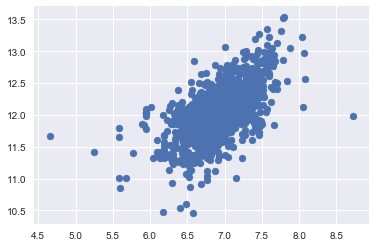

In [171]:
plt.scatter(train_data.loc[train_data['TotalBsmtSF']>0 , 'TotalBsmtSF'] ,
            train_data.loc[train_data['TotalBsmtSF']>0 , 'SalePrice'])

In [167]:
train_data['flag'] = pd.Series(len(train_data.TotalBsmtSF) , index=train_data.index)
train_data['flag'] = 0
train_data.loc[train_data['TotalBsmtSF'] > 0 , 'flag'] = 1
train_data.loc[train_data.flag == 1 , 'TotalBsmtSF'] = np.log(train_data.TotalBsmtSF)

I:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [177]:
train_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,flag
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,12.429216,1


In [182]:
type(train_data)

pandas.core.frame.DataFrame

In [186]:
train_data = train_data.drop('flag' , axis =1)

In [191]:
train_data.dtypes == type(pd.Series)

MSSubClass       False
MSZoning          True
LotArea          False
Street            True
LotShape          True
LandContour       True
Utilities         True
LotConfig         True
LandSlope         True
Neighborhood      True
Condition1        True
Condition2        True
BldgType          True
HouseStyle        True
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle         True
RoofMatl          True
Exterior1st       True
Exterior2nd       True
ExterQual         True
ExterCond         True
Foundation        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating           True
                 ...  
Electrical        True
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual       True
TotRmsAbvGr